<a href="https://colab.research.google.com/github/likeshd/datascience_case_study/blob/alpha/purchase_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [4]:
data.shape

(550068, 12)

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
data.describe(include = "O")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [7]:
data.describe(include = "all")

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


# **label encoding , ordinal encoding and one-hot encoding **

In [8]:
#Encoding----> Use only for categorical data
#1-label Encoding----only for binary classification and mostly used in target variable
#2-Ordinal Encoding-if rank is there in any column then we use this
#3-One-hot Encoding(dummy data)--->any where whereever we want deep statstics

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


# fit, transfer and fit-transfer

In [12]:
data['User_ID'] = le.fit_transform(data["User_ID"])
data['Product_ID'] = le.fit_transform(data["Product_ID"])
data['Gender'] = le.fit_transform(data["Gender"])
data['Age'] = le.fit_transform(data["Age"])

data['City_Category'] = le.fit_transform(data["City_Category"])

data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4+,0,8,NaN,NaN,7969
5,2,1831,1,2,15,0,3,0,1,2.0,NaN,15227
6,3,1745,1,4,7,1,2,1,1,8.0,17.0,19215
7,3,3320,1,4,7,1,2,1,1,15.0,NaN,15854
8,3,3604,1,4,7,1,2,1,1,16.0,NaN,15686
9,4,2631,1,2,20,0,1,1,8,NaN,NaN,7871


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 50.4+ MB


In [14]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
data["City_Category"].value_counts()

1    231173
2    171175
0    147720
Name: City_Category, dtype: int64

In [16]:
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,2948.888392,1707.473323,0.753105,2.496430,8.076707,1.042640,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1685.407072,1012.201109,0.431205,1.353632,6.522660,0.760211,0.491770,3.936211,5.086590,4.125338,5023.065394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1471.000000,930.000000,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,2995.000000,1666.000000,1.000000,2.000000,7.000000,1.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,4365.000000,2550.000000,1.000000,3.000000,14.000000,2.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,5890.000000,3630.000000,1.000000,6.000000,20.000000,2.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [17]:
data["Age"].value_counts()

2    219587
3    110013
1     99660
4     45701
5     38501
6     21504
0     15102
Name: Age, dtype: int64

In [18]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].replace('4+', '4')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [19]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,672,0,0,10,0,2,0,3,NaN,NaN,8370
1,0,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,852,0,0,10,0,2,0,12,NaN,NaN,1422
3,0,828,0,0,10,0,2,0,12,14.0,NaN,1057
4,1,2734,1,6,16,2,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,5883,3567,1,5,13,1,1,1,20,NaN,NaN,368
550064,5885,3568,0,2,1,2,3,0,20,NaN,NaN,371
550065,5886,3568,0,2,15,1,4,1,20,NaN,NaN,137
550066,5888,3568,0,6,1,2,2,0,20,NaN,NaN,365


In [20]:
data['Stay_In_Current_City_Years'] = data["Stay_In_Current_City_Years"].astype(int)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int64  
 2   Gender                      550068 non-null  int64  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int64  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 50.4 MB


In [21]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [22]:
data = data.dropna()

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int64  
 2   Gender                      166821 non-null  int64  
 3   Age                         166821 non-null  int64  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int64  
 6   Stay_In_Current_City_Years  166821 non-null  int64  
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 16.5 MB


In [24]:
data.shape

(166821, 12)

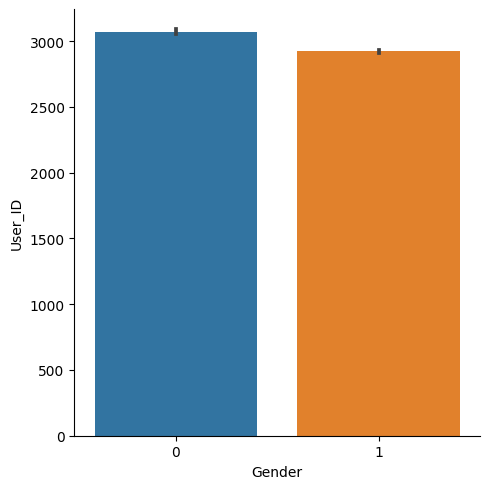

In [25]:
sns.catplot(data = data, x ="Gender", y = "User_ID", kind  = 'bar', )

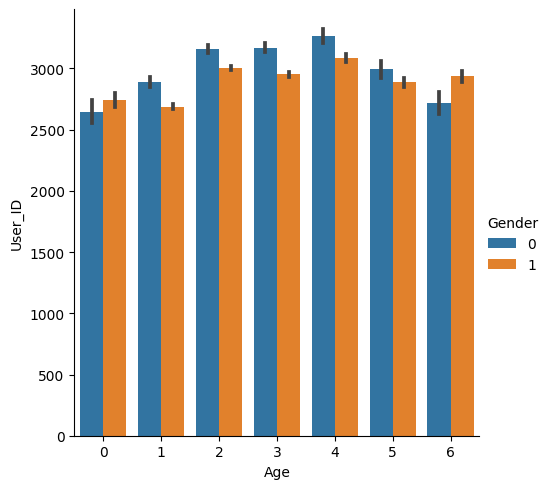

In [26]:
sns.catplot(data = data, x ="Age", y = "User_ID", kind  = 'bar', hue = 'Gender', height = 5)

<ipython-input-27-1dfe853d87c0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Purchase"])


<Axes: xlabel='Purchase', ylabel='Density'>

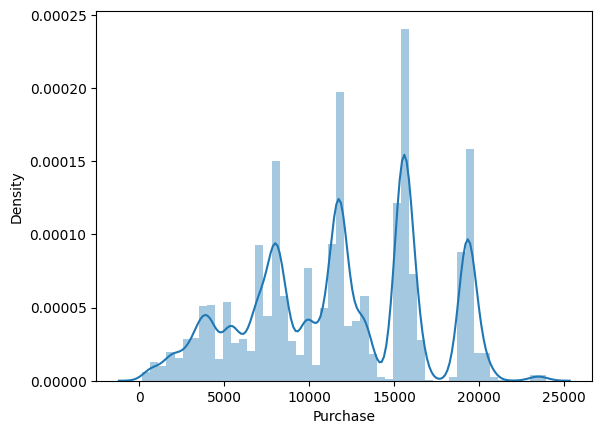

In [27]:
sns.distplot(data["Purchase"])

In [28]:
data.corr()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.007779,-0.036813,0.033455,-0.014515,0.018860,-0.026382,0.018669,0.010359,0.009073,0.003399,-0.000575
Product_ID,-0.007779,1.000000,0.011179,0.021203,0.006680,-0.019544,-0.001499,0.010292,0.025650,0.031936,0.026679,-0.106410
Gender,-0.036813,0.011179,1.000000,-0.005513,0.111920,-0.004953,0.010200,-0.010872,-0.076321,-0.016093,0.028069,0.060852
Age,0.033455,0.021203,-0.005513,1.000000,0.098123,0.100360,-0.008542,0.310920,0.051916,0.047871,0.057346,0.023937
Occupation,-0.014515,0.006680,0.111920,0.098123,1.000000,0.041711,0.026696,0.027368,-0.013682,0.001336,0.013263,0.025048
City_Category,0.018860,-0.019544,-0.004953,0.100360,0.041711,1.000000,0.016395,0.039678,-0.024514,-0.006612,-0.002347,0.077344
Stay_In_Current_City_Years,-0.026382,-0.001499,0.010200,-0.008542,0.026696,0.016395,1.000000,-0.014053,-0.002906,-0.000382,0.002093,0.007598
Marital_Status,0.018669,0.010292,-0.010872,0.310920,0.027368,0.039678,-0.014053,1.000000,0.015682,0.014813,0.019473,0.004603
Product_Category_1,0.010359,0.025650,-0.076321,0.051916,-0.013682,-0.024514,-0.002906,0.015682,1.000000,0.499115,0.229678,-0.396558
Product_Category_2,0.009073,0.031936,-0.016093,0.047871,0.001336,-0.006612,-0.000382,0.014813,0.499115,1.000000,0.543649,-0.153711


<Axes: >

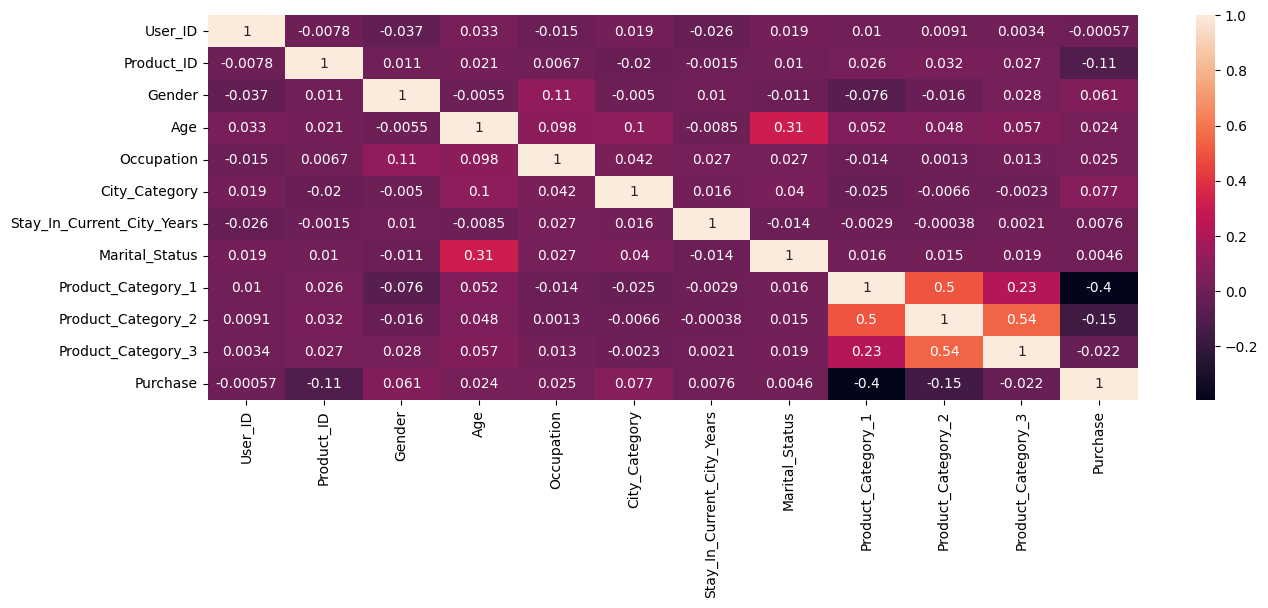

In [29]:
plt.figure(figsize  =(15,5))
sns.heatmap(data.corr(), annot =True)

In [30]:
!pip install pandas-profiling
!pip install pydantic-settings


# to get all eda report following libraries are used.

In [31]:
# import pandas as pd
# from pandas_profiling import ProfileReport
# data1=pd.read_csv('train.csv')
# profile=ProfileReport(data1)
# profile.to_notebook_iframe()
# profile.to_file('report.html')